# Final Project Report

* Class: DS 5100
* Student Name: Alanna Hazlett
* Student Net ID: uwa6xv
* This URL:\
https://github.com/AlannaHazlett/uwa6xv_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/AlannaHazlett/uwa6xv_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd
import itertools

class Die():
    '''Creates a die object that has elements, face values and weights.'''
    def __init__(self,faces):
        '''INPUT: faces, a numpy array comprised of numbers or letters.
           Initializes the die object creating a pandas DataFrame with index of face values and a column of the weights, which are defaulted to one for each face value.
           Checks to make sure faces is a numpy array and that the face values are distinct.'''
        self.faces = faces
        self.weights = [1.0 for i in self.faces]
        self._df = pd.DataFrame(dict(faces=self.faces, weights=self.weights)).set_index(['faces'])
                
        if type(self.faces) != np.ndarray:
            raise TypeError ("faces must be NumPy Array")
        else:
            pass
        
        _s = set()
        for i in range(0,len(self.faces)):
            _s.add(self.faces[i])
        if (len(_s) != len(self.faces)):
            raise ValueError ("Each face of die must be distinct")
            
            
    def change_weight(self,face_value,new_weight):
        '''Change the weight of a single face based on inputs.
           INPUTS: face_value, an value that is present on the die that you wish to change.
                   new_weight, an integer or float that will be assigned to the face of the die.'''
        if face_value in self.faces:
            if isinstance(new_weight, (float,int)):
                self._df.loc[face_value, 'weights'] = new_weight
            else: 
                raise TypeError ("The new weight must be a number")
        else:
            raise IndexError ("The face value you entered to be changed is not currently on the die")
    
    
    def roll_die(self,num_roll = 1):
        '''Rolls the die one or more times. 
           INPUT: num_roll, integer to dictate number of times to roll the die. One time is the default.
           OUTPUT: outcome, list of the result(s) of roll(s).'''
        outcome = [self._df.sample(weights=[i/sum(self._df.weights) for i in self._df.weights]).index[0] for i in range(num_roll)]
        return outcome    
   

    def current_state(self):
        '''Displays a pandas DataFrame of the current state of the die, comprising of the face values and weights.'''
        return self._df
            
        
class Game():
    '''Utilizes die object(s) to play a game, store the results, and display the results.'''
    def __init__(self,dice_in_play):
        '''Initializes game object utilizing die objects.
           INPUT: dice_in_play, a list of die objects. '''
        self.dice_in_play = dice_in_play
        
        
    def play(self,num_rolls):
        '''Rolls the di(c)e passed into the game object. Stores the results in a pandas DataFrame in wide format with roll number as index, columns as die index value, and results as entries.
           INPUT: num_rolls, an integer to specify number of times the di(c)e should be rolled.'''        
        roll_result = []
        for die in self.dice_in_play:
            outcome = die.roll_die(num_rolls)
            roll_result.append(outcome)
        d_result = dict(enumerate(roll_result))
        _df2 = pd.DataFrame(d_result)
        _df2.index = np.arange(1, len(_df2) + 1)
        _df2.index.name = "Roll Number"
        self._df2 = _df2
        
        #List of dice indices
        keys_list = list(d_result.keys())
        self.keys_list = keys_list
        
    
    def show_result(self,form = 'wide'):
        '''Displays the pandas DataFrame of results. Checks to see if form argument is string of 'narrow' or 'wide'.
           INPUT: form, string to specify display type of pandas DataFrame, as narrow or wide. Default display is in wide format with roll number as index, columns as die index value, and results as entries.
           OUTPUT: self._df2 or narrow, pandas DataFrame of results.'''
        if form == 'wide':
            return self._df2
        elif form == 'narrow': 
            narrow = pd.DataFrame(self._df2.stack([0]))
            narrow.index.names = ['Roll Number','Die ID']
            narrow.columns = ['Results']
            return narrow
        else:
            raise ValueError ("Results must be in 'wide' or 'narrow' form. Default is 'wide'.")
        

class Analyzer():
    '''Utilizes game object to analyze and display the results of the game.'''
    
    
    def __init__(self,game):
        '''Receives game object, checks to make sure it is a game object, and initalizes it.
        INPUT: game object.'''
        if isinstance(game, Game) == True:
            self.game = game
        else:
            raise ValueError ("Parameter passed must be a Game object")
       
    
    def jackpot(self):
        '''Computes how many times the game resulted in all faces being the same.
           OUTPUT: num_jackpot, an integer that indicates how many times the game resulted in all faces being the same.'''
        num_jackpot = 0
        num_jackpot = sum(self.game._df2.eq(self.game._df2.iloc[:, 0], axis=0).all(1)) 
        return num_jackpot  
    
    
    def faces_per_roll(self):
        '''Computes how many times a given face is rolled in each event.
           OUTPUT: face_count_df, a pandas DataFrame with index of roll number, columns of face values, and entries for number of occurances.'''
        face_count_df = self.game._df2.stack().groupby(level=0).value_counts().unstack(fill_value=0)
        self.face_count_df = face_count_df
        return face_count_df
    
    
    def count_combo(self):
        '''Computes the distinct combinations of faces rolled, along with their counts.
           OUTPUT: combinations, a pandas DataFrame with Index of distinct combinations and a column for the associated counts.'''       
        combinations = list(itertools.combinations_with_replacement(self.face_count_df,self.game._df2.shape[1]))    
        combo = [str(list(i)) for i in combinations]
        cc_df = pd.DataFrame(index = combo)
        cc_df.index.names = ['Combinations']
        cc_df['Count'] = 0
        #Getting counts for cc_df by finding matching rows in self.game._df2
        for i in range(1,len(self.game._df2) + 1):
            match = str(sorted(list(self.game._df2.loc[i])))
            cc_df.loc[match][0] = cc_df.loc[match][0] + 1
        return cc_df
    
    
    def count_permutation(self):           
        '''Computes the distinct permutations of faces rolled, along with their counts.
           OUTPUT: perm, a pandas DataFrame that has a MultiIndex of distinct permutations and a column for the associated counts. '''
        perm = pd.DataFrame(self.game._df2.value_counts(self.game.keys_list).sort_index())
        return perm        
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

Write a unit test file using the Unittest package containing at least one method for each method in each of the three classes above. \
As a general rule, each test method should verify that the target method creates an appropriate data structure.

```
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer


class DieTestSuite(unittest.TestCase):
    def test_01_die_init(self):
        # Create instance
        die_test_object = Die(np.array([1,2,3,4,5,6]))
        self.assertEqual(type(die_test_object._df),pd.core.frame.DataFrame)
        
    def test_02_change_weight(self):
        # Create instance
        die_test_object = Die(np.array([1,2,3,4,5,6]))
        # Change weight 
        die_test_object.change_weight(1,5)
        # Test change
        self.assertEqual(die_test_object._df.iloc[0,0], 5)
        self.assertEqual(type(die_test_object._df),pd.core.frame.DataFrame)  
        
    def test_03_roll_die(self):
        # Create instance
        die_test_object = Die(np.array([1,2,3,4,5,6]))
        # Roll the die 5 times and test that it rolled 5 times
        self.assertEqual(len(die_test_object.roll_die(5)),5)
        
    def test_04_current_state(self):
        # Create instance
        die_test_object = Die(np.array([1,2,3,4,5,6]))
        die_test_object.change_weight(6,3)
        # Tests
        self.assertEqual(type(die_test_object.current_state()),pd.core.frame.DataFrame)   
        
          
class GameTestSuite(unittest.TestCase): 
    
    def test_05_game_init(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game_test_object = Game([die1,die2,die3])
        self.assertTrue(isinstance(game_test_object,Game))
        
    def test_06_play(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game_test_object = Game([die1,die2,die3])
        # Play game
        game_test_object.play(5)
        # Test
        self.assertEqual(type(game_test_object._df2),pd.core.frame.DataFrame)
        self.assertEqual(len(game_test_object._df2),5)
                         
    def test_07_show_result(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game_test_object = Game([die1,die2,die3])
        # Play game
        game_test_object.play(5)
        # Test
        self.assertEqual(type(game_test_object.show_result('wide')),pd.core.frame.DataFrame)
        self.assertEqual(type(game_test_object.show_result('narrow')),pd.core.frame.DataFrame)
        self.assertTrue(len(game_test_object.show_result('wide')) == 5)
        self.assertTrue(len(game_test_object.show_result('narrow')) == 15)

                         
class AnalyzerTestSuite(unittest.TestCase):  
                         
    def test_08_analyze_init(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game1 = Game([die1,die2,die3])
        # Play game
        game1.play(5)                 
        # Create Analyzer
        analyze_test_object = Analyzer(game1)
        self.assertTrue(isinstance(analyze_test_object, Analyzer))
                         
    def test_09_jackpot(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game1 = Game([die1,die2,die3]) 
        # Play game
        game1.play(5)
        # Create Analyzer
        analyze_test_object = Analyzer(game1) 
        self.assertTrue(isinstance(analyze_test_object.jackpot(),int))
                         
    def test_10_faces_per_roll(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game1 = Game([die1,die2,die3]) 
        # Play game
        game1.play(5)                 
        # Create Analyzer
        analyze_test_object = Analyzer(game1)
        self.assertTrue(isinstance(analyze_test_object.faces_per_roll(),pd.core.frame.DataFrame))
        self.assertEqual(len(analyze_test_object.faces_per_roll()),5)
                         
                         
    def test_11_count_combo(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game1 = Game([die1,die2,die3])
        # Play game
        game1.play(5)                 
        # Create Analyzer
        analyze_test_object = Analyzer(game1)
        analyze_test_object.faces_per_roll()
        # Test
        self.assertEqual(type(analyze_test_object.count_combo()),pd.core.frame.DataFrame)
                         
    def test_12_count_permutation(self):
        # Create Dice
        die1 = Die(np.array([1,2,3,4,5,6]))
        die2 = Die(np.array([1,2,3,4,5,6]))
        die3 = Die(np.array([1,2,3,4,5,6]))
        # Create Game
        game1 = Game([die1,die2,die3])
        # Play game
        game1.play(5)                 
        # Create Analyzer
        analyze_test_object = Analyzer(game1)
        # Test
        self.assertEqual(type(analyze_test_object.count_permutation()),pd.core.frame.DataFrame)
   
             
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
/home/uwa6xv/Documents/MSDS/DS5100/uwa6xv_ds5100_montecarlo/montecarlo
-bash-4.4$python montecarlo_test.py 
test_08_analyze_init (__main__.AnalyzerTestSuite.test_08_analyze_init) ... ok
test_09_jackpot (__main__.AnalyzerTestSuite.test_09_jackpot) ... ok
test_10_faces_per_roll (__main__.AnalyzerTestSuite.test_10_faces_per_roll) ... ok
test_11_count_combo (__main__.AnalyzerTestSuite.test_11_count_combo) ... ok
test_12_count_permutation (__main__.AnalyzerTestSuite.test_12_count_permutation) ... ok
test_01_die_init (__main__.DieTestSuite.test_01_die_init) ... ok
test_02_change_weight (__main__.DieTestSuite.test_02_change_weight) ... ok
test_03_roll_die (__main__.DieTestSuite.test_03_roll_die) ... ok
test_04_current_state (__main__.DieTestSuite.test_04_current_state) ... ok
test_05_game_init (__main__.GameTestSuite.test_05_game_init) ... ok
test_06_play (__main__.GameTestSuite.test_06_play) ... ok
test_07_show_result (__main__.GameTestSuite.test_07_show_result) ... ok
----------------------------------------------------------------------
Ran 12 tests in 0.079s
OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
!pip install montecarlo

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from montecarlo import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Utilizes game object to analyze and display the results of the game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Receives game object, checks to make sure it is a game object, and initalizes it.
     |      INPUT: game object.
     |  
     |  count_combo(self)
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      OUTPUT: combinations, a pandas DataFrame with Index of distinct combinations and a column for the associated counts.
     |  
     |  count_permutation(self)
     |      Computes the distinct permutations of faces rolled, along with their counts.
     |      OUTPUT: perm, a pandas DataFrame that has a MultiIndex of distinct permutations and a column for 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/AlannaHazlett/uwa6xv_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```
/home/uwa6xv/Documents/MSDS/DS5100/uwa6xv_ds5100_montecarlo
-bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/qumulo/qhome/uwa6xv/Documents/MSDS/DS5100/uwa6xv_ds5100_montecarlo
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-0.0.1-py3-none-any.whl size=5272 sha256=597721cf808956583813f0f9cc8cf1fbbc42012
ae12b1b8a747c118fe03f8ee5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4z_epeyo/wheels/14/87/12/800a8a98d0b45b62073d241ab39aace8b127bd77527bd66965
Successfully built montecarlo
Installing collected packages: montecarlo
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 0.1.17
    Uninstalling montecarlo-0.1.17:
      Successfully uninstalled montecarlo-0.1.17
Successfully installed montecarlo-0.0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
from montecarlo.montecarlo import Die, Game, Analyzer

In [5]:
import numpy as np
import pandas as pd
import itertools

In [6]:
coin_faces = np.array(["H","T"])
fair_coin = Die(coin_faces)
fair_coin.current_state()

,weights
faces,
H,1.0
T,1.0


In [7]:
unfair_coin = Die(coin_faces)
unfair_coin.change_weight("H",5)
unfair_coin.current_state()

,weights
faces,
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
game1 = Game([fair_coin,fair_coin])
game1.play(1000)
game1.show_result()

,0,1
Roll Number,,
1,H,H
2,H,H
3,T,T
4,H,H
5,H,H
...,...,...
996,H,T
997,H,T
998,T,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
game2 = Game([fair_coin,unfair_coin,unfair_coin])
game2.play(1000)
game2.show_result()

,0,1,2
Roll Number,,,
1,T,H,T
2,H,H,H
3,H,H,H
4,H,H,H
5,T,H,T
...,...,...,...
996,T,H,H
997,T,H,H
998,T,H,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [10]:
analyzer1 = Analyzer(game1)
print(analyzer1.game._df2.value_counts())
analyzer1.jackpot()

0  1
H  H    264
   T    254
T  H    249
   T    233
Name: count, dtype: int64


497

In [11]:
analyzer2 = Analyzer(game2)
print(analyzer2.game._df2.value_counts())
analyzer2.jackpot()

0  1  2
T  H  H    347
H  H  H    338
      T     79
T  T  H     76
H  T  H     69
T  H  T     68
H  T  T     12
T  T  T     11
Name: count, dtype: int64


349

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [12]:
rel_freq1 = analyzer1.jackpot()/len(analyzer1.game._df2)
rel_freq1

0.497

In [13]:
rel_freq2 = analyzer2.jackpot()/len(analyzer2.game._df2)
rel_freq2

0.349

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<Axes: xlabel='Game'>

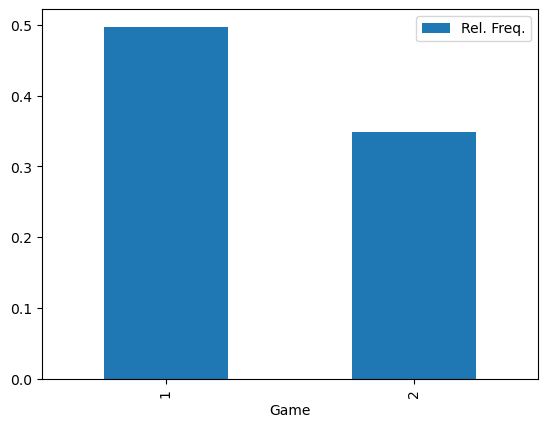

In [14]:
test_df = pd.DataFrame({'Game' :['1','2'], 'Rel. Freq.':[rel_freq1,rel_freq2]})
test_df.plot.bar(x='Game',y='Rel. Freq.')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [15]:
faces = np.array([1,2,3,4,5,6])
die1 = Die(faces)
die2 = Die(faces)
die3 = Die(faces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [16]:
die1.change_weight(6,5)
die1._df

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [17]:
die2.change_weight(1,5)
die2._df

,weights
faces,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [18]:
fair_die_game = Game([die3,die3,die3,die3,die3])

In [19]:
fair_die_game.play(10000)
fair_die_game.show_result()

,0,1,2,3,4
Roll Number,,,,,
1,3,5,6,4,4
2,3,1,5,5,3
3,1,4,6,1,3
4,3,4,3,5,1
5,2,3,5,3,1
...,...,...,...,...,...
9996,1,2,5,1,5
9997,2,6,3,5,5
9998,5,6,4,6,3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
unfair_die_game = Game([die1,die2,die3,die3,die3])
unfair_die_game.play(10000)
unfair_die_game.show_result()

,0,1,2,3,4
Roll Number,,,,,
1,3,4,3,6,3
2,6,3,4,6,3
3,6,1,4,5,1
4,3,1,4,4,2
5,4,1,2,5,6
...,...,...,...,...,...
9996,6,1,3,4,6
9997,6,1,1,2,3
9998,6,1,2,6,1


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [21]:
fair_die_analyze = Analyzer(fair_die_game)
fair_die_jack_freq = fair_die_analyze.jackpot()/len(fair_die_analyze.game._df2)
fair_die_jack_freq

0.0005

In [22]:
unfair_die_analyze = Analyzer(unfair_die_game)
unfair_die_jack_freq = unfair_die_analyze.jackpot()/len(unfair_die_analyze.game._df2)
unfair_die_jack_freq

0.0007

<Axes: xlabel='Game'>

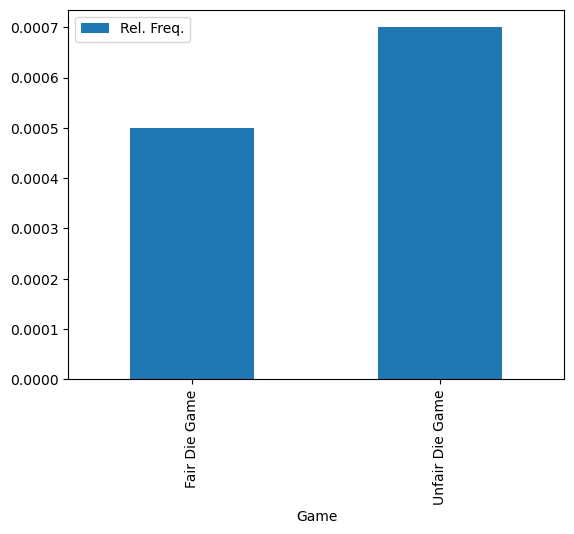

In [23]:
test_df = pd.DataFrame({'Game' :['Fair Die Game','Unfair Die Game'], 'Rel. Freq.':[fair_die_jack_freq,unfair_die_jack_freq]})
test_df.plot.bar(x='Game',y='Rel. Freq.')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [24]:
letters = pd.read_csv("english_letters.txt", sep=" ", header=None, names = ["Letter","Frequency"])

let_nump = letters["Letter"].to_numpy()
freq_list = list(letters["Frequency"])
letter_die = Die(let_nump)
print(letter_die.current_state())

for i in range(len(freq_list)):
    letter_die.change_weight(let_nump[i],freq_list[i]) 
    
letter_die.current_state()

       weights
faces         
E          1.0
T          1.0
A          1.0
O          1.0
I          1.0
N          1.0
S          1.0
R          1.0
H          1.0
L          1.0
D          1.0
C          1.0
U          1.0
M          1.0
F          1.0
G          1.0
P          1.0
W          1.0
Y          1.0
B          1.0
V          1.0
K          1.0
J          1.0
X          1.0
Z          1.0
Q          1.0


,weights
faces,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [25]:
letter_game = Game([letter_die,letter_die,letter_die,letter_die])
letter_game.play(1000)
letter_game.show_result()

,0,1,2,3
Roll Number,,,,
1,F,W,A,C
2,T,C,S,O
3,O,H,R,U
4,O,H,I,S
5,O,A,O,A
...,...,...,...,...
996,H,P,F,A
997,C,T,E,R
998,B,D,O,R


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [26]:
letter_analyze = Analyzer(letter_game)
letter_result_df = letter_analyze.count_permutation()
#Change MultiIndex into One Column
perm_as_col = letter_analyze.count_permutation().reset_index()
perm_as_col['Words'] = perm_as_col[perm_as_col.columns[:4]].apply(lambda x: ''.join(x.astype(str)),axis=1)
#Create List of Column values
perm_as_col_list = perm_as_col['Words'].values.tolist()
perm_as_col_list[:5]

['AAOY', 'AAUS', 'AAVF', 'ABDH', 'ABVT']

In [27]:
scrabble_words = pd.read_csv("scrabble_words.txt", sep=" ", header=None, names = ["Words"])
scrabble_words_4=scrabble_words[scrabble_words.Words.apply(lambda x: len(str(x)))==4]
#Make List of Column values
scrabble_4_list = scrabble_words_4['Words'].values.tolist()
scrabble_4_list[:5]

['AAHS', 'AALS', 'ABAC', 'ABAS', 'ABBA']

In [28]:
word_4_count=0
for item in perm_as_col_list:
    if item in scrabble_4_list:
        word_4_count = word_4_count + 1
print(f"There are {word_4_count} four letter words created in the game that are recognized by Scrabble.")

There are 50 four letter words created in the game that are recognized by Scrabble.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [29]:
letter_game2 = Game([letter_die,letter_die,letter_die,letter_die,letter_die])
letter_game2.play(1000)
letter_game2.show_result()

,0,1,2,3,4
Roll Number,,,,,
1,H,T,O,L,E
2,T,T,A,E,A
3,N,I,G,H,S
4,T,T,R,D,H
5,A,E,E,C,A
...,...,...,...,...,...
996,A,D,R,R,O
997,U,F,S,W,L
998,P,M,F,O,A


In [30]:
letter_analyze2 = Analyzer(letter_game2)
letter_result_df2 = letter_analyze2.count_permutation()
letter_result_df2
#Change MultiIndex into One Column
perm_as_col2 = letter_analyze2.count_permutation().reset_index()
perm_as_col2['Words'] = perm_as_col2[perm_as_col2.columns[:5]].apply(lambda x: ''.join(x.astype(str)),axis=1)
#Create List of Column values
perm_as_col_list2 = perm_as_col2['Words'].values.tolist()
perm_as_col_list2[:5]

['AAELV', 'AANDR', 'AARAE', 'AARUB', 'AATNT']

In [31]:
scrabble_words_5=scrabble_words[scrabble_words.Words.apply(lambda x: len(str(x)))==5]
#Make List of Column values
scrabble_5_list = scrabble_words_5['Words'].values.tolist()
scrabble_5_list[:5]

['AAHED', 'AALII', 'AARGH', 'AARTI', 'ABACA']

In [32]:
word_5_count=0
for item in perm_as_col_list2:
    if item in scrabble_5_list:
        word_5_count = word_5_count + 1
print(f"There are {word_5_count} five letter words created in the game that are recognized by Scrabble.")

There are 6 five letter words created in the game that are recognized by Scrabble.


In [33]:
if word_5_count > word_4_count:
    diff_5_4 = word_5_count - word_4_count
    print(f"The game with 5 letters resulted in more words being found, with {diff_5_4} more words than the 4 letter game.")
elif word_4_count > word_5_count:
    diff_4_5 = word_4_count - word_5_count
    print(f"The game with 4 letters resulted in more words being found, with {diff_4_5} more words than the 5 letter game.")
else:
    print("Uh oh, something happened!")

The game with 4 letters resulted in more words being found, with 44 more words than the 5 letter game.


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.